### 第三次作业

季宇桐 2100017820

#### 第一题

对于Chebyshev多项式，

$\begin{aligned}
&T_0(x)=1\\
&T_1(x)=x\\
&T_2(x)=2x^2-1\\
&T_3(x)=4x^3-3x\\
&T_4(x)=8x^4-8x^2+1\\
&T_5(x)=16x^5-20x^3+5x
\end{aligned}$

下面我们分别计算3阶近似和5阶近似时的系数。

In [1]:
import numpy as np
import math

def f(x):
    a = x**6 + 3*x**5 + 4*x**4 + 1/3*x**3 + 2*x**2 + x - 10
    return a

c_3 = [0.0,0.0,0.0,0.0]

N = 4   #3阶近似时N=4

for m in range(0, N):
    for k in range(0, N):
        c_3[m] += math.cos(m*math.pi*(k+0.5)/N)*f(math.cos(math.pi*(k+0.5)/N))
    c_3[m] = 2/N*c_3[m]
    
c_3[0] = c_3[0]/2   #给c_0除以2


print("S_3(x)=", "%.5f" % c_3[0] ,"T_0(x) + ","%.5f" % c_3[1] ,"T_1(x) + ","%.5f" % c_3[2] ,"T_2(x) + ","%.5f" % c_3[3], "T_3(x)")

c_5 = [0.0,0.0,0.0,0.0,0.0,0.0]

N = 6  #5阶近似时N=6

for m in range(0, N):
    for k in range(0, N):
        c_5[m] += math.cos(m*math.pi*(k+0.5)/N)*f(math.cos(math.pi*(k+0.5)/N))
    c_5[m] = 2/N*c_5[m]
    
c_5[0] = c_5[0]/2   #给c_0除以2


print("S_5(x)=", "%.5f" % c_5[0] ,"T_0(x) + ","%.5f" % c_5[1] ,"T_1(x) + ","%.5f" % c_5[2] ,"T_2(x) + ","%.5f" % c_5[3], "T_3(x) + ","%.5f" % c_5[4], "T_4(x) + ","%.5f" % c_5[5], "T_5(x)")



S_3(x)= -7.18750 T_0(x) +  3.12500 T_1(x) +  3.43750 T_2(x) +  0.83333 T_3(x)
S_5(x)= -7.18750 T_0(x) +  3.12500 T_1(x) +  3.46875 T_2(x) +  1.02083 T_3(x) +  0.68750 T_4(x) +  0.18750 T_5(x)


由上面结果得到

$S_3(x)= -7.18750 T_0(x) +  3.12500 T_1(x) +  3.43750 T_2(x)  + 0.83333 T_3(x)\\
S_5(x)= -7.18750 T_0(x)  + 3.12500 T_1(x) +  3.46875 T_2(x)  +  1.02083 T_3(x) + 0.68750 T_4(x)  +  0.18750 T_5(x)$

下面带入各个Chebyshev多项式，画图对比：

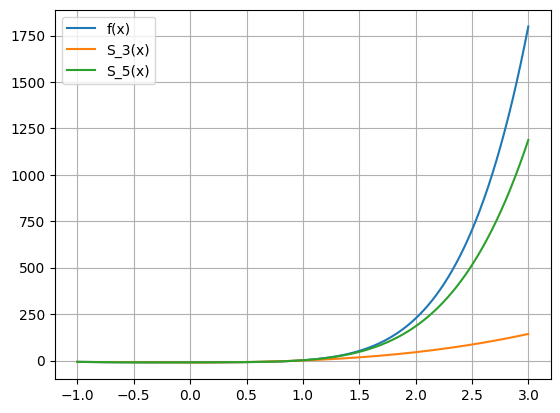

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    a = x**6 + 3*x**5 + 4*x**4 + 1/3*x**3 + 2*x**2 + x - 10
    return a

def T_0(x):
    return 1
def T_1(x):
    return x
def T_2(x):
    return 2*x**2-1
def T_3(x):
    return 4*x**3-3*x
def T_4(x):
    return 8*x**4-8*x**2+1
def T_5(x):
    return 16*x**5-20*x**3+5*x

x = np.arange(-1, 3, 0.001)
y1 = []
y2 = []
y3 = []
for i in x:
    y1.append(f(i))
    y2.append(-7.18750* T_0(i) +  3.12500* T_1(i) +   3.43750* T_2(i) +  0.83333* T_3(i))
    y3.append(-7.18750* T_0(i) +  3.12500* T_1(i) +  3.46875* T_2(i) +  1.02083* T_3(i) +  0.68750* T_4(i) +  0.18750* T_5(i))

plt.plot(x, y1, label="f(x)")
plt.plot(x, y2, label="S_3(x)")
plt.plot(x, y3, label="S_5(x)")
plt.grid()
plt.legend()
plt.show()

这里我们加以讨论，可以看出拟和的效果在(1,3)并不好，这是因为被逼近的函数是个比较病态的函数，原函数在(-1,1)上比较平缓，而在(1,3)上增加的非常快, 因此外推效果一般。在(-1,1)部分，放大(需复制代码在独立端口运行)后可以观察到，5阶的拟合效果很贴近原函数，但3阶函数有所偏离，也是预期之中的情况。在附件中有mma计算n=1到n=9的结果，供参考.

#### 第二题

首先我们知道$f(x)=e^x$的Taylor展开是
$e^x=\sum_{n=0}^\infty \frac{x^n}{n!}$,因此$c_k=\frac{1}{k!}$. 由$M=N=2$时的Pade近似公式，有

$\begin{aligned}
&b_1 c_{1+k} + b_2 c_{k} = -c_{2+k} \qquad k=1,2\\
&b_0 c_1 + b_1 c_0 = a_1\\
&b_0 c_2 + b_1 c_1 + b_2 c_0 = a_2
\end{aligned}$

解得$b_1=-\frac{1}{2} \quad b_2=\frac{1}{12}$.

由于$b_0=1$,可以解得$a_1=\frac{1}{2} \quad a_2=\frac{1}{12}$, 且有$a_0=c_0=1$.

最后有

$\begin{aligned}
R(x)=\frac{1+\frac{1}{2}x+\frac{1}{12}x^2}{1-\frac{1}{2}x+\frac{1}{12}x^2}\\
=\frac{x^2+6x+12}{x^2-6x+12}
\end{aligned}$

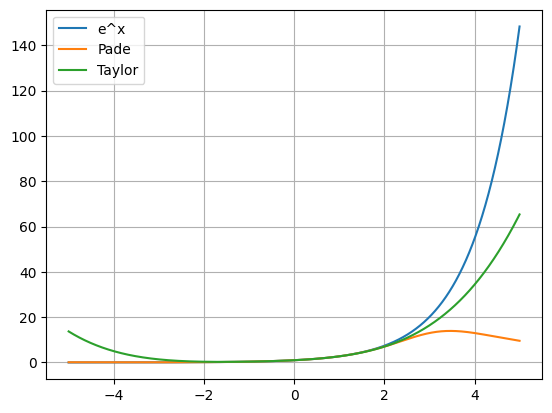

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def T_0(x):
    return 1

x = np.arange(-5, 5, 0.001)
y1 = np.e**x
y2 = []
y3 = []
for i in x:
    y2.append((i**2+6*i+12)/(i**2-6*i+12))
    y3.append(1+i+i**2/2+i**3/6+i**4/24)
plt.plot(x, y1, label="e^x")
plt.plot(x, y2, label="Pade")
plt.plot(x, y3, label="Taylor")
plt.grid()
plt.legend()
plt.show()

通过作图对比$e^x$,(2,2)阶Pade近似和Taylor展开到第五项，我们可以看出，Pade近似在展开点0附近拟合效果与原函数接近，在$x<0$的部分优于仅保留五项的Taylor展开，而在$x\ge3$附近快速的偏离了原函数，趋势也不一致，拟合效果不如Taylor展开。

#### 第三题

对于梯形法则：

格点数取为10时，共有9个区间，则步长$h=\frac{100-1}{9}=11$.

格点数取为100时，共有99个区间，则步长$h=\frac{100-1}{99}=1$.

格点数取为1000时，共有999个区间，则步长$h=\frac{100-1}{999}=\frac{11}{111}$.

利用梯形法则计算如下：

In [4]:
import numpy as np

def f(x):
    a = np.e**(-x)/x
    return a

h = [11,1,11/111]
a = 3*[0]

for i in range(0,10):
    if i==0 or i==9:
        a[0] += f(1+i*h[0])/2
    else:
        a[0] += f(1+i*h[0])
a[0] *= h[0]

for i in range(0,100):
    if i==0 or i==99:
        a[1] += f(1+i*h[1])/2
    else:
        a[1] += f(1+i*h[1])
a[1] *= h[1]

for i in range(0,1000):
    if i==0 or i==999:
        a[2] += f(1+i*h[2])/2
    else:
        a[2] += f(1+i*h[2])
a[2] *= h[2]

print(a)


[2.023342558686669, 0.2747354248013607, 0.21998528440244558]


结果分别为 2.02334，0.27474，0.21999.

上面我们直接使用了最基本的梯形公式，这是因为相同步长下相邻两个区间的项存在相消，对于Simpson公式，我们直接计算每个小段再求和，代码如下：

In [5]:
import numpy as np

def f(x):
    a = np.e**(-x)/x
    return a

def P(a,b):
    c = (b-a)/6*(f(a) + 4*f((a+b)/2) + f(b))
    return c

h = [11,1,11/111]
a = 3*[0]

for i in range(0,9):
        a[0] += P(1+i*h[0], 1+(i+1)*h[0])

for i in range(0,99):
        a[1] += P(1+i*h[1], 1+(i+1)*h[1])

for i in range(0,999):
        a[2] += P(1+i*h[2], 1+(i+1)*h[2])

print(a)

[0.6761437178920752, 0.2207570044818058, 0.21938413034561494]


结果分别为 0.67614，0.22076，0.21938.

可以看出收敛速度快了很多，并且在1000个格点时结果也更接近真实值$0.21938 \cdots$.

下面是Gauss-Legendre方法，查阅相关资料得到函数numpy.polynomial.legendre.leggauss可以用来计算权函数为1时的高斯点和权重因子。

并且我们需要将积分区间从 [-1,1] 更改到 [1,100] ,有以下公式：

$\int _{a}^{b}f(x)\,dx\approx {\frac {b-a}{2}}\sum _{i=1}^{n}w_{i}f\left({\frac {b-a}{2}}\xi _{i}+{\frac {a+b}{2}}\right)$

In [6]:
import numpy as np
def f(x):
    return np.e**(-x)/x

a = 0
x,y=np.polynomial.legendre.leggauss(10)
for i in range(0,10):
    a += y[i]*f((100-1)/2*x[i]+(100+1)/2)
a *= (100-1)/2
print(a)

a = 0
x,y=np.polynomial.legendre.leggauss(100)
for i in range(0,100):
    a += y[i]*f((100-1)/2*x[i]+(100+1)/2)
a *= (100-1)/2
print(a)

0.1460447647170332
0.21938393439544168


结果分别是0.14604，0.21938，可以看到，这次的收敛很好，在100个点时就可以计算出相对准确的结果。

#### 第四题
(a)

首先是二分法求解：

1.8954963684082031


(0.0, 1.0, 0.0, 1.0)

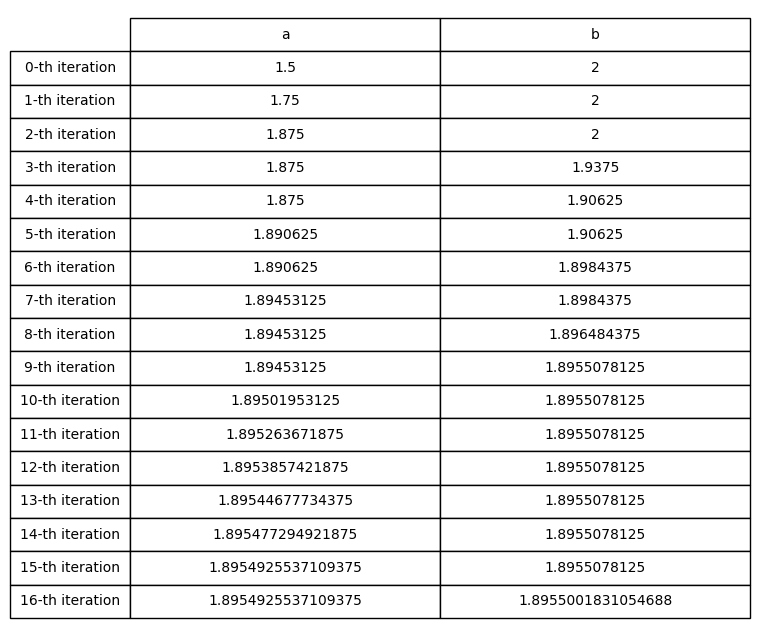

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x - 2* np.sin(x)

a = 1.5
b = 2
n = 0 #迭代次数
vals = 2*[] #表格值
vals.append([a,b])

while b-a > 10**(-5):
    x = a + (b-a)/2
    if f(x)*f(a)>0:
        a = x
    else:
        b = x
    vals.append([a,b])
    n += 1

x = a + (b - a)/2
print(x)


col=['a','b']
row=[]
for i in range(0,n+1):
    row.append(str(i)+"-th iteration")

plt.figure(figsize=(8,8))
tab = plt.table(cellText=vals, 
              colLabels=col, 
              rowLabels=row,
              loc='center', 
              cellLoc='center',
              rowLoc='center')
tab.scale(1,2) 
plt.axis('off')

计算结果为1.8954963684082031，精度为(b-a), 由此可见在第十六次迭代达到精度要求。

下面是牛顿法，易得 $f^\prime (x)=1-2\cos(x)$：

1.8954942764727707


(0.0, 1.0, 0.0, 1.0)

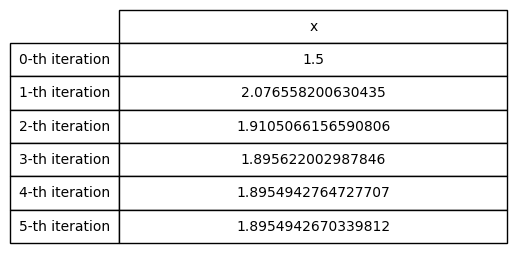

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x - 2* np.sin(x)

def g(x):
    return 1 - 2* np.cos(x)

x = 1.5
vals = []
vals.append([x])
k = 0
xl = 0 #代表上一个迭代的x

while f(x) > 10**(-5) or np.abs(x-xl) > 10**(-5):
    xl = x
    x = x - f(x)/g(x)
    k += 1
    vals.append([x])
x = xl

print(x)


col=['x']
row=[]
for i in range(0,k+1):
    row.append(str(i)+"-th iteration")

plt.figure(figsize=(5,3))
tab = plt.table(cellText=vals, 
              colLabels=col, 
              rowLabels=row,
              loc='center', 
              cellLoc='center',
              rowLoc='center')
tab.scale(1,2) 
plt.axis('off')

计算结果为1.8954942764727707，精度为函数值和相邻x的差的绝对值，在第五次迭代时满足精度要求。

下面是割线法：

1.895493907210378


(0.0, 1.0, 0.0, 1.0)

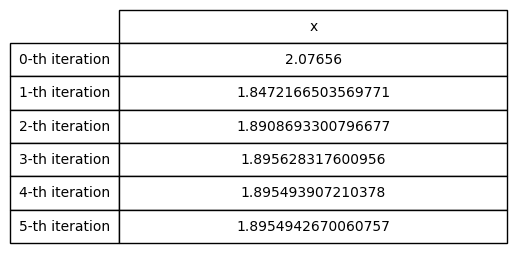

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x - 2* np.sin(x)

x = 2.07656 #牛顿法的x1
vals = []
vals.append([x])
k = 0
xl = 1.5 #代表上一个迭代的x

while f(x) > 10**(-5) or np.abs(x-xl) > 10**(-5):
    p = xl #临时存储
    xl = x
    x = x - f(x)*(x-p)/(f(x)-f(p))
    k += 1
    vals.append([x])
x = xl

print(x)


col=['x']
row=[]
for i in range(0,k+1):
    row.append(str(i)+"-th iteration")

plt.figure(figsize=(5,3))
tab = plt.table(cellText=vals, 
              colLabels=col, 
              rowLabels=row,
              loc='center', 
              cellLoc='center',
              rowLoc='center')
tab.scale(1,2) 
plt.axis('off')

结果为1.895493907210378，割线法在第五次达到要求，考虑到初始条件，这只比牛顿法慢了一次迭代，但是可以省去计算导数，是一种很好的替代方案。

(b)这实际上是(a)中的$[f(x)]^2$，因此是非负的，我们无法用二分法求解。

先计算$f(x)$的导函数，为$2(x-2\sin x)(1-2\cos x)$，

对上一题代码稍作修改，有：

1.8954828315696473


(0.0, 1.0, 0.0, 1.0)

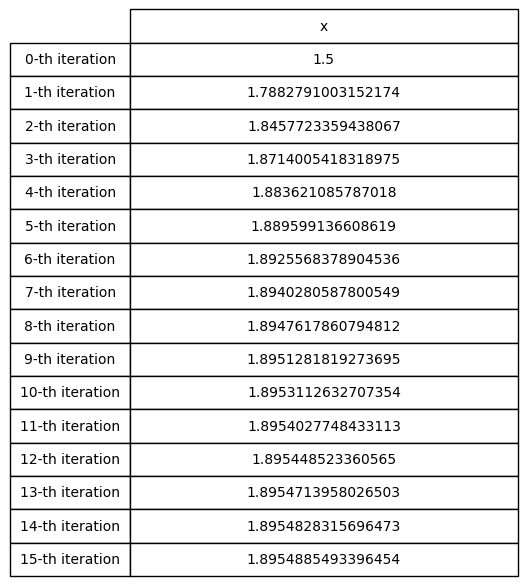

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 2* np.sin(x))**2

def g(x):
    return 2*(x - 2* np.sin(x))*(1 - 2* np.cos(x))

x = 1.5
vals = []
vals.append([x])
k = 0
xl = 0 #代表上一个迭代的x

while f(x) > 10**(-5) or np.abs(x-xl) > 10**(-5):
    xl = x
    x = x - f(x)/g(x)
    k += 1
    vals.append([x])
x = xl

print(x)


col=['x']
row=[]
for i in range(0,k+1):
    row.append(str(i)+"-th iteration")

plt.figure(figsize=(5,3))
tab = plt.table(cellText=vals, 
              colLabels=col, 
              rowLabels=row,
              loc='center', 
              cellLoc='center',
              rowLoc='center')
tab.scale(1,2) 
plt.axis('off')

结果为1.8954828315696473，在第十五次迭代时满足要求。

割线法：

1.8954765796091337


(0.0, 1.0, 0.0, 1.0)

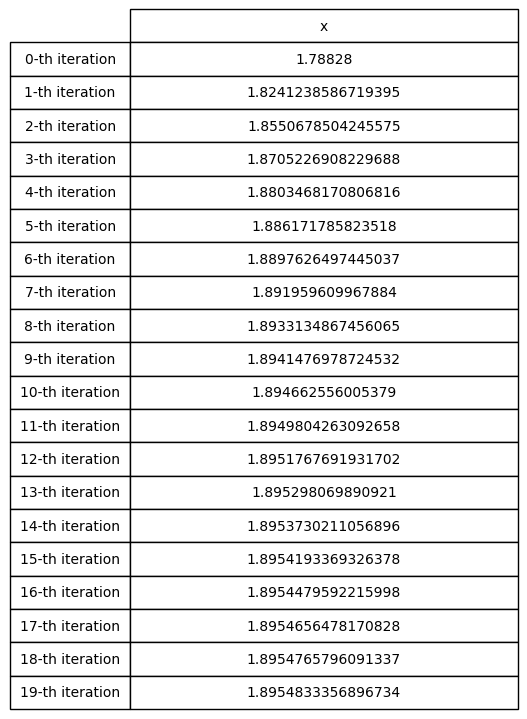

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 2* np.sin(x))**2

x = 1.78828 #牛顿法的x1
vals = []
vals.append([x])
k = 0
xl = 1.5 #代表上一个迭代的x

while f(x) > 10**(-5) or np.abs(x-xl) > 10**(-5):
    p = xl #临时存储
    xl = x
    x = x - f(x)*(x-p)/(f(x)-f(p))
    k += 1
    vals.append([x])
x = xl

print(x)


col=['x']
row=[]
for i in range(0,k+1):
    row.append(str(i)+"-th iteration")

plt.figure(figsize=(5,3))
tab = plt.table(cellText=vals, 
              colLabels=col, 
              rowLabels=row,
              loc='center', 
              cellLoc='center',
              rowLoc='center')
tab.scale(1,2) 
plt.axis('off')

割线法的结果为1.8954765796091337，需要19次迭代，由此可见本题的复杂度相较上题明显提升。